In [ ]:
import pandas as pd

# Load the dataset
file_path = '../data/reviews/wine_reviews.csv' 
wine_data = pd.read_csv(file_path)

# Display the first few rows
print(wine_data.head())


                                              review
0  Easily the best Sauvignon Blanc I've had to da...
1                    Excellent, Mockingbird Inn?\r\n
2  Absolutely incredible. One of the best sauvign...
3                   Reported in nytimes. Did not try
4  Great. Much different than other Sauv Blancs s...


In [2]:
pip install transformers


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: transformers in c:\users\achin\anaconda3\lib\site-packages (4.46.3)



In [3]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [2]:
from transformers import pipeline

# Specify device=0 if you have a GPU or device=-1 for CPU
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", framework="pt")
  

In [3]:
labels = [
    "talks about food combinations",
    "talks about taste",
    "talks about value for money",
    "other"
]


In [5]:
# Count missing values in each column
missing_values = wine_data.isnull().sum()

# Display missing values
print(missing_values)

review         0
talks_about    0
dtype: int64


In [4]:
# Assuming the review text is in a column named 'review'
def classify_review(review):
    if pd.isnull(review):  # Handle missing reviews
        return "other"
    result = classifier(review, labels)
    return result["labels"][0]  # Return the top label

# Apply the classifier to each review
wine_data["talks_about"] = wine_data["review"].apply(classify_review)

# Display the updated DataFrame
print(wine_data.head())


                                              review        talks_about
0  Easily the best Sauvignon Blanc I've had to da...  talks about taste
1                    Excellent, Mockingbird Inn?\r\n  talks about taste
2  Absolutely incredible. One of the best sauvign...  talks about taste
3                   Reported in nytimes. Did not try              other
4  Great. Much different than other Sauv Blancs s...              other


In [8]:
output_path = '../data/reviews/wine_reviews_with_labels.csv'
wine_data.to_csv(output_path, index=False)
print(f"Updated dataset saved to {output_path}")


Updated dataset saved to ../data/reviews/wine_reviews_with_labels.csv


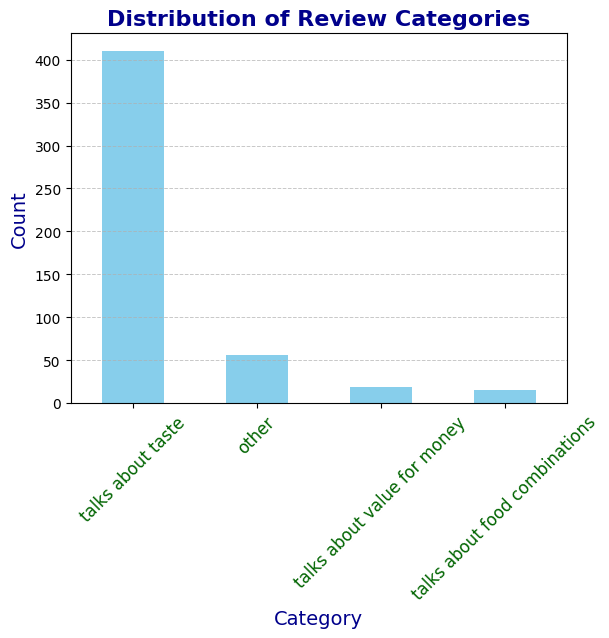

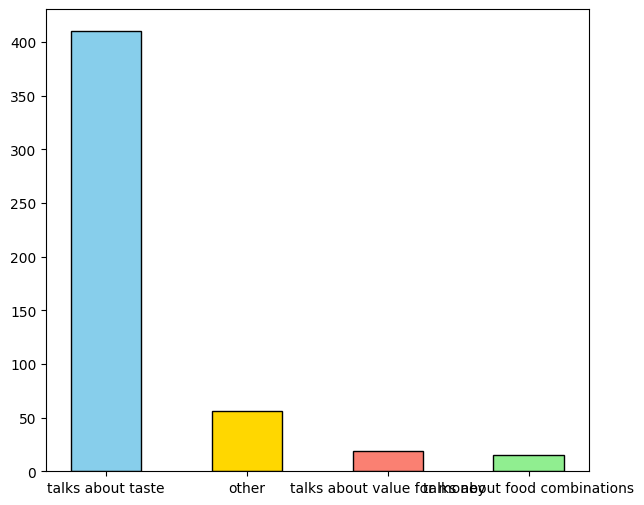

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = wine_data["talks_about"].value_counts()

# Create a bar chart
category_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of Review Categories",fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Category",fontsize=14, color='darkblue')
plt.ylabel("Count",fontsize=14, color='darkblue')
plt.xticks(rotation=45, fontsize=12, color='darkgreen')
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()




# # Define a mapping of categories to colors
# category_colors = {
#     "talks about taste": "skyblue",
#     "talks about food combinations": "lightgreen",
#      "talks about value for money": "salmon",
#     "other": "gold",
    
# }

# # Map the categories to their corresponding colors
# bar_colors = [category_colors.get(category, "gray") for category in category_counts.index]
# # Set bar width
# bar_width = 0.5
# # Create a bar chart
# plt.figure(figsize=(7, 6))  # Set the figure size
# bars = plt.bar(category_counts.index, category_counts.values, color=bar_colors, edgecolor='black',width=bar_width)

